In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
import csv 

import pandas as pd
from csv import reader
training = []
counter = 0
test = []
with open('bitcointweets.csv', 'r', encoding="utf8") as read_obj:
    csv_reader = reader(read_obj)
    for row in csv_reader:
        x = {}
        x['text'] = row[1]
        y = row[-1]
        if y == "['neutral']":
            x['sentiment'] = 2
            training.append(x)
        elif y == "['positive']":
            x['sentiment'] = 4
            training.append(x)

        elif y == "['negative']":
            x['sentiment'] = 0
            training.append(x)
        if counter==5000:
            break
        counter += 1
dataset = pd.DataFrame(training) 
# 0: Negative
# 2: Neutral
# 4: Positive

In [5]:
import csv 

import pandas as pd
from csv import reader
counter = 0
test = []
n = 0
p = 0
neutral = 0
with open('bitcointweets.csv', 'r', encoding="utf8") as read_obj:
    csv_reader = reader(read_obj)
    for row in csv_reader:
        x = {}
        x['text'] = row[1]
        y = row[-1]
        if y == "['neutral']":
            neutral += 1
            test.append(x)
        elif y == "['positive']":
            p += 1
            test.append(x)

        elif y == "['negative']":
            n += 1
            test.append(x)
        if counter==5000:
            break
        counter += 1
test = pd.DataFrame(training) 
# 0: Negative
# 2: Neutral
# 4: Positive

In [30]:
# Dataset is now stored in a Pandas Dataframe

## **Format Data:**

In [31]:
dataset.head()

,text,sentiment
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",2
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,2
2,RT @tippereconomy: Another use case for #block...,4
3,free coins https://t.co/DiuoePJdap,4
4,RT @payvxofficial: WE are happy to announce th...,4


In [32]:
# To list:

sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()
testsentences = test['text'].tolist()

In [33]:
print(sentences[1])
print(labels[1])



@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy
2


In [34]:
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0: training_size]
testing_senteces = sentences[: training_size]
training_labels = labels[0: training_size]
testing_labels = labels[: training_size]

# Put labels into list to use later:

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## **Tokenizing and Pad**

In [35]:
vocab_size = 1000
embedding_dim = 16
max_length = 280
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [36]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_senteces)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## **Building the Model**

In [37]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(embedding_dim,
                         return_sequences=True)
))
model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [38]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=['accuracy'])

In [39]:
callbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False
)
num_epochs=10
modelo = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final),
          callbacks=[callbacks])

Epoch 1/10
125/125 [==============================] - 17s 139ms/step - loss: -23.3346 - accuracy: 2.9464e-05 - val_loss: -25.6955 - val_accuracy: 0.0000e+00
Epoch 2/10
125/125 [==============================] - 16s 128ms/step - loss: -25.7015 - accuracy: 1.0000e-04 - val_loss: -25.7144 - val_accuracy: 0.0011
Epoch 3/10
125/125 [==============================] - 16s 132ms/step - loss: -25.8256 - accuracy: 0.0100 - val_loss: -26.0432 - val_accuracy: 0.0240
Epoch 4/10
125/125 [==============================] - 16s 126ms/step - loss: -26.0764 - accuracy: 0.0265 - val_loss: -26.0693 - val_accuracy: 0.0264
Epoch 5/10
125/125 [==============================] - 16s 126ms/step - loss: -26.0648 - accuracy: 0.0261 - val_loss: -26.0368 - val_accuracy: 0.0271


Text(0, 0.5, 'Accuracy')

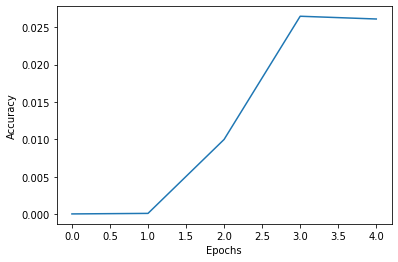

In [41]:
# Decrease because the early stopping

plt.plot(modelo.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

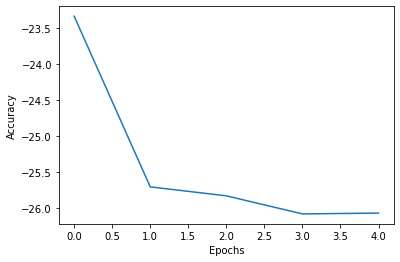

In [42]:
# Increase because the early stopping

plt.plot(modelo.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

## **Testing**

13/13 - 0s


Positive


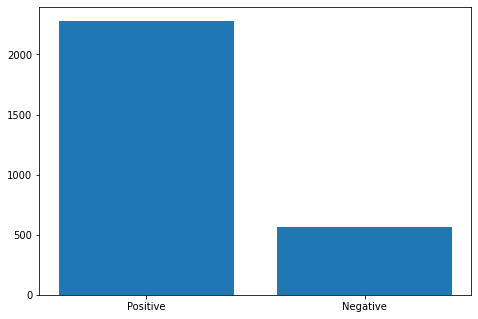

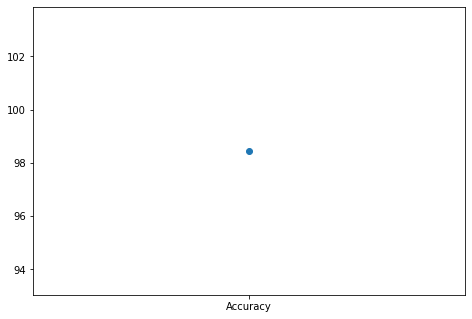